In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import sys

import math
from datetime import datetime
from glob import glob
from datetime import timedelta
plt.style.use('ggplot')
from mpl_toolkits.basemap import Basemap
from igrf12py.igrf12fun import runigrf12, plotigrf 
%matplotlib inline
import requests
import os
import utils
import autoreload

In [16]:
# relative path to data dir
drifter_data_dir = 'data'
# I'm setting pretty conservative start/stop times based on plots of the data
base_drifter_dict = {
            'sneezy': {'type':'APS', 'id':66760, 'launch':'2012-08-26 00:00:00', 'end':'2012-10-12 00:00:00'}, 
            'bashful':{'type':'HMR', 'id':68740, 'launch':'2012-09-05 00:00:00', 'end':'2013-02-15 00:00:00'}, 
            'grumpy': {'type':'HMR', 'id':11070, 'launch':'2012-08-23 00:00:00', 'end':'2013-01-15 00:00:00'}, 
            'dopey':  {'type':'APS', 'id':68760, 'launch':'2012-09-15 00:00:00', 'end':'2013-01-01 00:00:00'}, 
             # sleepy looks like the z measurement is dominating the signal 
            'sleepy': {'type':'APS', 'id':19370, 'launch':'2012-09-01 00:00:00', 'end':'2013-06-01 00:00:00'}, 
            }

In [ ]:
reload(utils)
drifter_dict = utils.parse_raw_files(drifter_data_dir, base_drifter_dict)

downloading from buoys/cdea2h2012.txt
downloading from buoys/cdea2h2013.txt
downloading from buoys/46005h2013.txt
Unable to access data at http://www.ndbc.noaa.gov/view_text_file.php?filename=46005h2013.txt.gz&dir=data/historical/stdmet/
Loading sneezy and writing measured and calibration data files

In [5]:
drifter_dict = utils.parse_txt_files(drifter_data_dir, base_drifter_dict)
ld = drifter_dict['sneezy']['list']

Loading sneezy and writing measured and calibration data files


In [19]:
ld.columns

Index([u'bat', u'cal_start_datetime', u'calsx', u'calsy', u'calsz', u'id',
       u'lat', u'lon', u'temp', u'igrfx', u'igrfy', u'igrfz', u'igrff'],
      dtype='object')

In [15]:
drifter_dict = utils.parse_txt_files(drifter_data_dir, base_drifter_dict)

Loading sneezy and writing measured and calibration data files


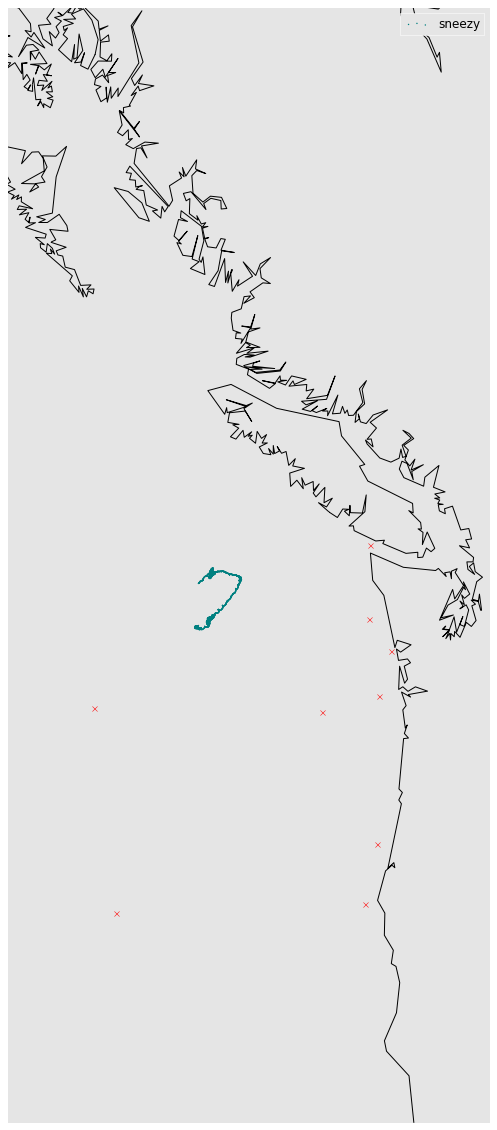

In [13]:
# Plot locations of the data
plt.figure(figsize=(20,20))
#build a map
m = Basemap(projection='merc', ellps='WGS84',
           llcrnrlat=39, 
           urcrnrlat=56, 
           llcrnrlon=-133,
           urcrnrlon=-122,
           resolution='l')

cc = ['teal', 'orangered', 'violet', 'cornflowerblue', 'magenta']
for nn, drifter in enumerate(drifter_dict.keys()):
    md = drifter_dict[drifter]['meas']
    x, y = m(np.array(md['lon']), np.array(md['lat']))
    m.scatter(x, y, c=cc[nn], edgecolor="None", s=2, label=drifter)
  
for  bid in utils.buoy_list.keys():    
    latb, lonb = utils.buoy_list[bid]
    xb, yb = m(np.array(lonb), np.array(latb))
    m.scatter(xb, yb, s=26, c='r', marker='x')
    
m.drawcoastlines()
plt.legend()
plt.show()

In [254]:
# look at the calibration values
for nn in drifter_dict.keys():
#for nn in ['sleepy']:
    print(nn)
    
    dl = drifter_dict[nn]['list']
    dl.index = range(len(dl.index))
    #plt.figure(figsize=(20,7))
    for r in range(20):
        dx = dl.loc[r,'calsx']
        dffx = np.where(np.ediff1d(dx) < 100)

        dy = dl.loc[r,'calsy']
        dffy = np.where(np.ediff1d(dy) < 100)

        dz = dl.loc[r,'calsz']
        dffz = np.where(np.ediff1d(dz) < 100)
        #plt.plot(dffx, 'r')
        #plt.plot(dffy, 'b')
        #plt.plot(dffz, 'g')
    #plt.show()

sneezy
sleepy
grumpy
bashful
dopey


bashful


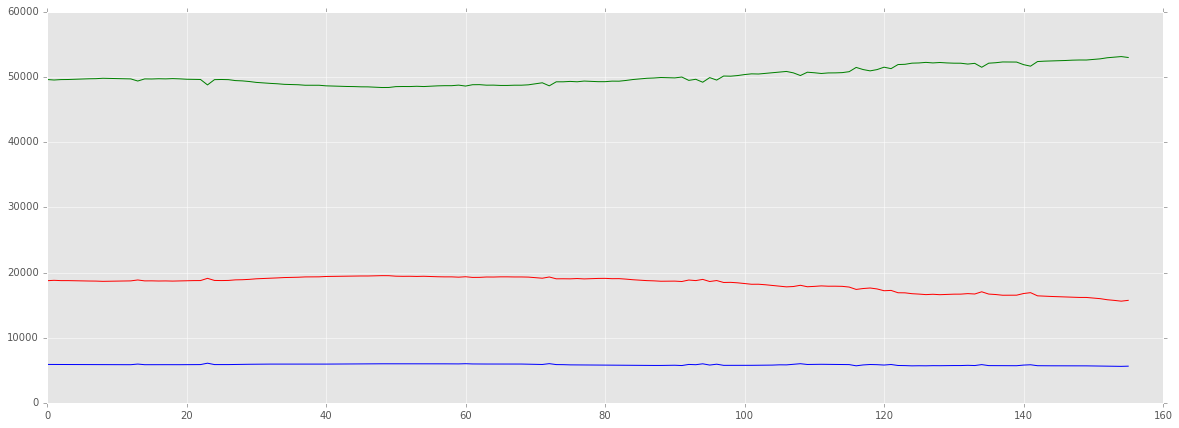

sleepy


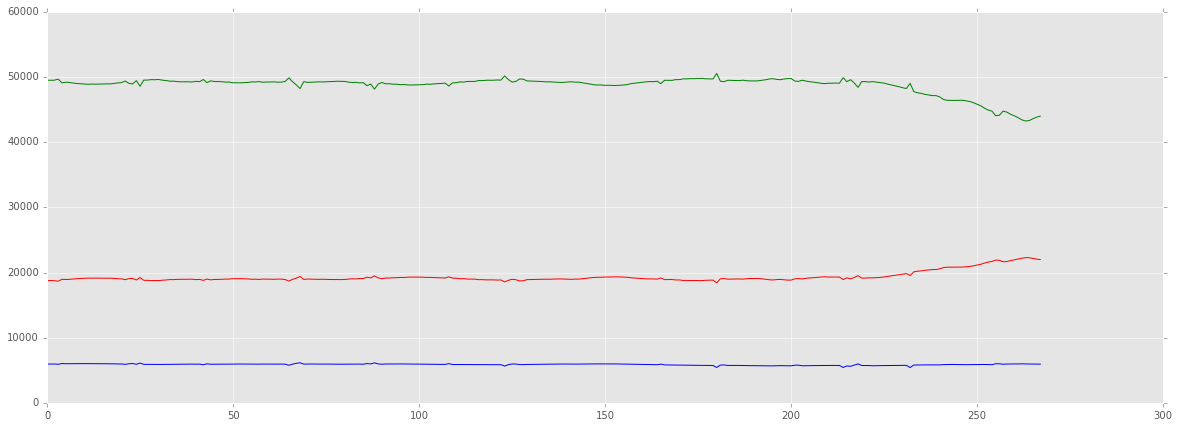

sneezy


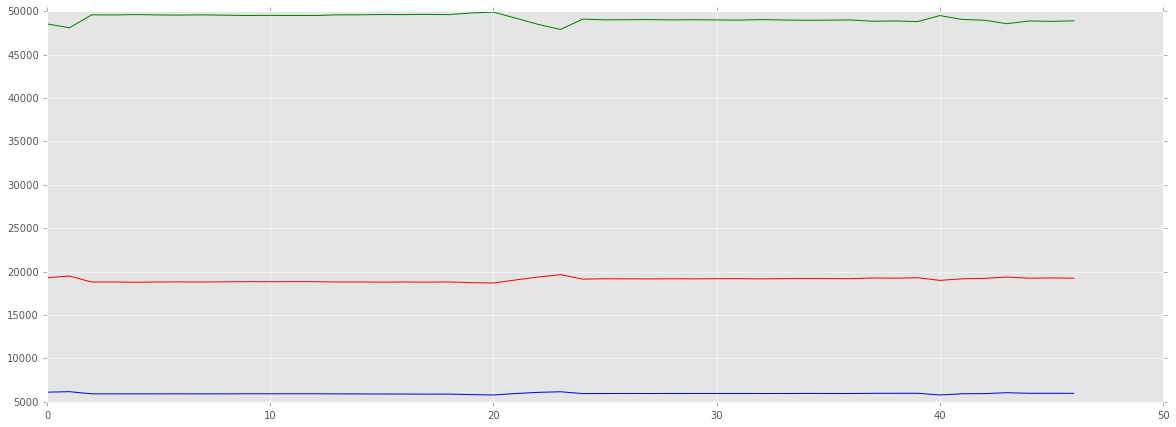

grumpy


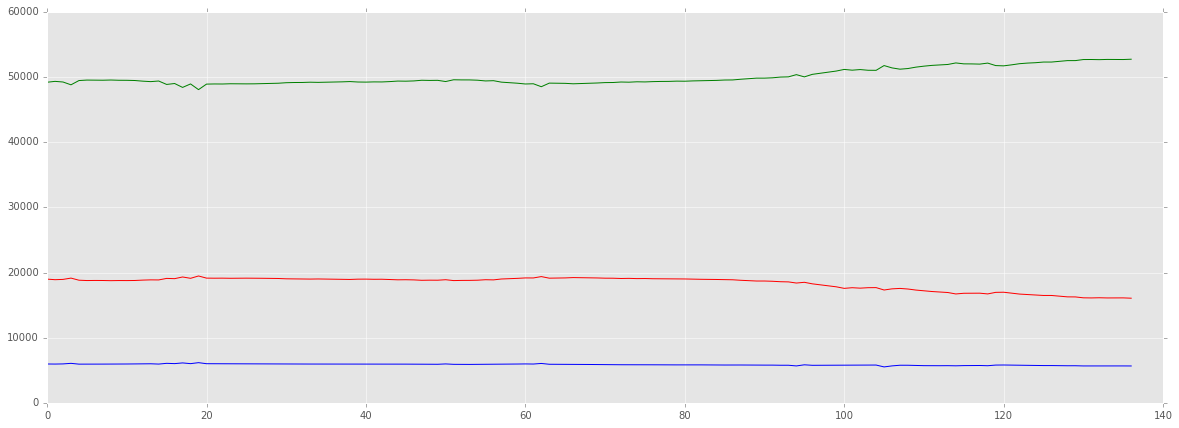

dopey


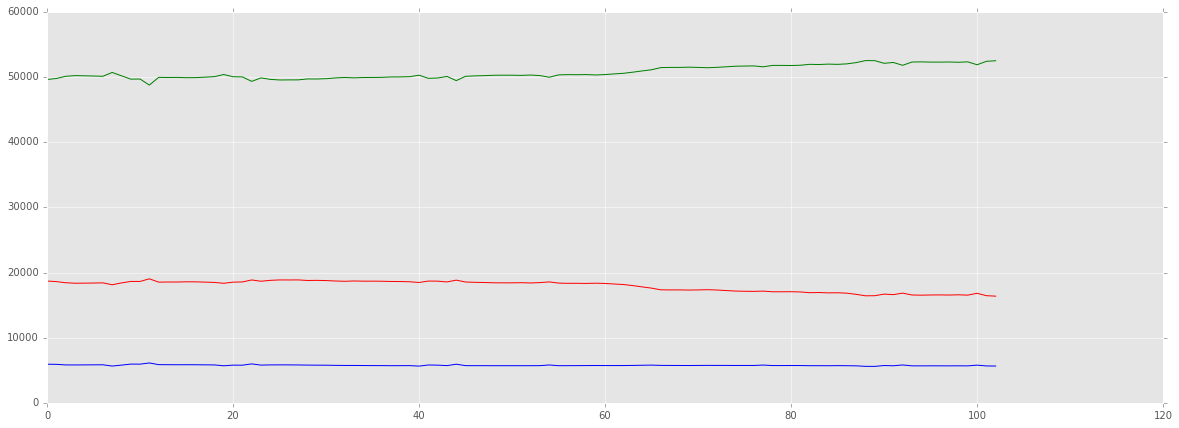

In [181]:
#look at the model values
for nn in drifter_dict.keys():
    print(nn)
    dl = drifter_dict[nn]['list']
    dl.index = range(len(dl.index))
    plt.figure(figsize=(20,7))
   
    plt.plot(dl['igrfx'], 'r')
    plt.plot(dl['igrfy'], 'b')
    plt.plot(dl['igrfz'], 'g')
    plt.show()



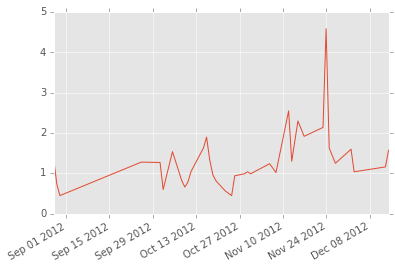

In [289]:
ss = ss[ss.loc[:,"WVHT"] != 99.00]
md = drifter_dict['grumpy']['list']
o = pd.merge(md, ss, left_index=True, right_index=True)
o['WVHT'].plot()